In [1]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Step 2: Define sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1 - sx)


In [3]:
# Step 3: Define the Perceptron class
class SigmoidPerceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn()
        self.lr = learning_rate

    def forward(self, x):
        z = np.dot(x, self.weights) + self.bias
        return sigmoid(z), z

    def train(self, X, y, epochs=10000):
        loss_history = []
        for epoch in range(epochs):
            total_loss = 0
            for i in range(len(X)):
                x_i = X[i]
                y_i = y[i]
                pred, z = self.forward(x_i)
                error = y_i - pred
                loss = error ** 2
                total_loss += loss

                # Backpropagation
                dcost_dpred = -2 * error
                dpred_dz = sigmoid_derivative(z)
                dz_dw = x_i
                dz_db = 1

                self.weights -= self.lr * dcost_dpred * dpred_dz * dz_dw
                self.bias -= self.lr * dcost_dpred * dpred_dz * dz_db

            loss_history.append(total_loss)
        return loss_history

    def predict(self, X):
        return [1 if sigmoid(np.dot(x, self.weights) + self.bias) >= 0.5 else 0 for x in X]


In [4]:
# Step 4: Define dataset for NAND and XOR
X = np.array([[0,0],[0,1],[1,0],[1,1]])

# NAND output
y_nand = np.array([1, 1, 1, 0])

# XOR output
y_xor = np.array([0, 1, 1, 0])


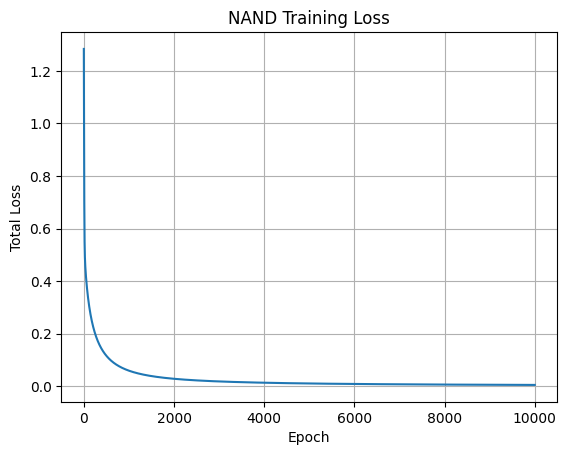

NAND Prediction Results:
Input: [0 0], Predicted: 1, Expected: 1
Input: [0 1], Predicted: 1, Expected: 1
Input: [1 0], Predicted: 1, Expected: 1
Input: [1 1], Predicted: 0, Expected: 0


In [5]:
# Step 5: Train and visualize for NAND
perceptron_nand = SigmoidPerceptron(input_size=2, learning_rate=0.1)
loss_nand = perceptron_nand.train(X, y_nand)

plt.plot(loss_nand)
plt.title("NAND Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.grid(True)
plt.show()

# Show predictions
print("NAND Prediction Results:")
for i, x in enumerate(X):
    pred = perceptron_nand.predict([x])[0]
    print(f"Input: {x}, Predicted: {pred}, Expected: {y_nand[i]}")


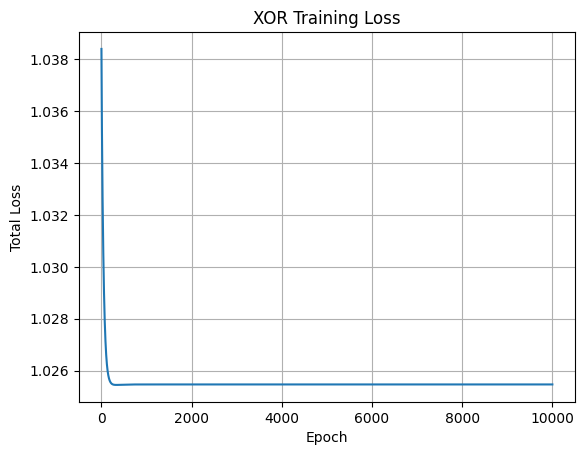

XOR Prediction Results:
Input: [0 0], Predicted: 1, Expected: 0
Input: [0 1], Predicted: 1, Expected: 1
Input: [1 0], Predicted: 0, Expected: 1
Input: [1 1], Predicted: 0, Expected: 0


In [6]:
# Step 6: Train and visualize for XOR
perceptron_xor = SigmoidPerceptron(input_size=2, learning_rate=0.1)
loss_xor = perceptron_xor.train(X, y_xor)

plt.plot(loss_xor)
plt.title("XOR Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.grid(True)
plt.show()

# Show predictions
print("XOR Prediction Results:")
for i, x in enumerate(X):
    pred = perceptron_xor.predict([x])[0]
    print(f"Input: {x}, Predicted: {pred}, Expected: {y_xor[i]}")


To futher more show the details why we successfully achieved NAND gate but not NOR gate, I asked gpt to show Final Decision Boundary for both gate.

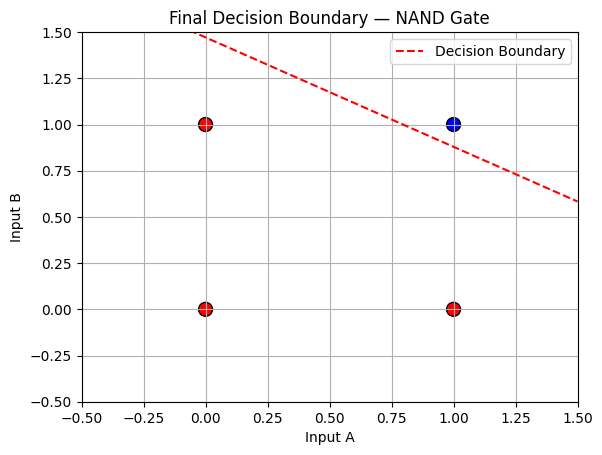

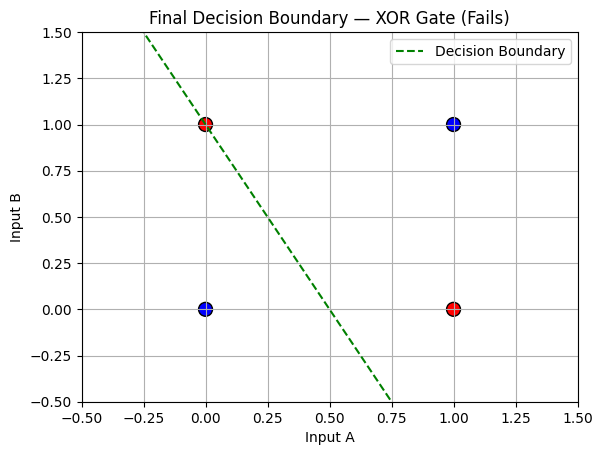

In [ ]:
# Final decision boundary for NAND
fig1, ax1 = plt.subplots()
ax1.set_title("Final Decision Boundary — NAND Gate")
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.5, 1.5)
ax1.set_xlabel("Input A")
ax1.set_ylabel("Input B")

# Show training points
ax1.scatter(X[:, 0], X[:, 1], c=y_nand, cmap='bwr', s=100, edgecolors='k')

# Plot decision line from final weights
w_nand = perceptron_nand.weights
b_nand = perceptron_nand.bias
x_vals = np.array([-0.5, 1.5])
y_vals_nand = -(w_nand[0] * x_vals + b_nand) / (w_nand[1] + 1e-6)
ax1.plot(x_vals, y_vals_nand, 'r--', label="Decision Boundary")
ax1.legend()
ax1.grid(True)

# Train and plot for XOR
perceptron_xor = SigmoidPerceptron(input_size=2, learning_rate=0.1)
loss_xor = perceptron_xor.train(X, y_xor)

fig2, ax2 = plt.subplots()
ax2.set_title("Final Decision Boundary — XOR Gate (Fails)")
ax2.set_xlim(-0.5, 1.5)
ax2.set_ylim(-0.5, 1.5)
ax2.set_xlabel("Input A")
ax2.set_ylabel("Input B")

# Show training points
ax2.scatter(X[:, 0], X[:, 1], c=y_xor, cmap='bwr', s=100, edgecolors='k')

# Plot decision line from final weights
w_xor = perceptron_xor.weights
b_xor = perceptron_xor.bias
y_vals_xor = -(w_xor[0] * x_vals + b_xor) / (w_xor[1] + 1e-6)
ax2.plot(x_vals, y_vals_xor, 'g--', label="Decision Boundary")
ax2.legend()
ax2.grid(True)

plt.show()




As we can observe above, with 2 input single neuron, we can only create one staight linear line to decide boundry for classfication of the outputs in the 2D math plot. To futher expression of non-liearity, we need add an additional neruon to create non-linear region in the space to sperate expected output.

Input (2 units) → Hidden Layer (e.g., 2 neurons) → Output (1 unit)


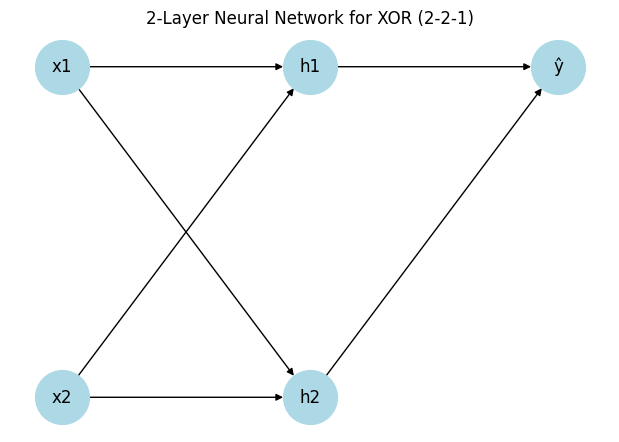

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_2layer_nn(input_size=2, hidden_size=2, output_size=1):
    G = nx.DiGraph()

    # Add nodes
    for i in range(input_size):
        G.add_node(f"x{i+1}", pos=(0, -i))
    for j in range(hidden_size):
        G.add_node(f"h{j+1}", pos=(1.5, -j + 0.5 * (input_size - hidden_size)))
    G.add_node("ŷ", pos=(3, 0))

    # Add edges from input to hidden
    for i in range(input_size):
        for j in range(hidden_size):
            G.add_edge(f"x{i+1}", f"h{j+1}")
    # Add edges from hidden to output
    for j in range(hidden_size):
        G.add_edge(f"h{j+1}", "ŷ")

    # Plot
    pos = nx.get_node_attributes(G, 'pos')
    plt.figure(figsize=(6, 4))
    nx.draw(G, pos, with_labels=True, node_size=1500, node_color='lightblue', arrows=True, font_size=12)
    plt.title("2-Layer Neural Network for XOR (2-2-1)")
    plt.axis("off")
    plt.show()

# Draw the network
draw_2layer_nn()


In [15]:
# Step 8: Define a 2-layer neural network for XOR
class TwoLayerNN:
    def __init__(self, input_size=2, hidden_size=2, lr=0.1):
        self.lr = lr
        self.w1 = np.random.randn(input_size, hidden_size)  # weights for input → hidden
        self.b1 = np.zeros(hidden_size)                     # biases for hidden layer
        self.w2 = np.random.randn(hidden_size)              # weights for hidden → output
        self.b2 = np.random.randn()                         # bias for output

    def forward(self, x):
        self.z1 = np.dot(x, self.w1) + self.b1       # hidden layer input
        self.a1 = sigmoid(self.z1)                   # hidden layer output
        self.z2 = np.dot(self.a1, self.w2) + self.b2 # final output input
        output = sigmoid(self.z2)                    # output
        return output

    def backward(self, x, y_true):
        output = self.forward(x)
        error = y_true - output
        d_output = error * sigmoid_derivative(self.z2)

        # Backpropagate to hidden layer
        d_hidden = d_output * self.w2 * sigmoid_derivative(self.z1)

        # Update weights and biases
        self.w2 += self.lr * d_output * self.a1
        self.b2 += self.lr * d_output
        self.w1 += self.lr * np.outer(x, d_hidden)
        self.b1 += self.lr * d_hidden

        return error ** 2

    def train(self, X, y, epochs=10000):
        loss_history = []
        for _ in range(epochs):
            total_loss = 0
            for i in range(len(X)):
                total_loss += self.backward(X[i], y[i])
            loss_history.append(total_loss)
        return loss_history

    def predict(self, X):
        return [1 if self.forward(x) >= 0.5 else 0 for x in X]


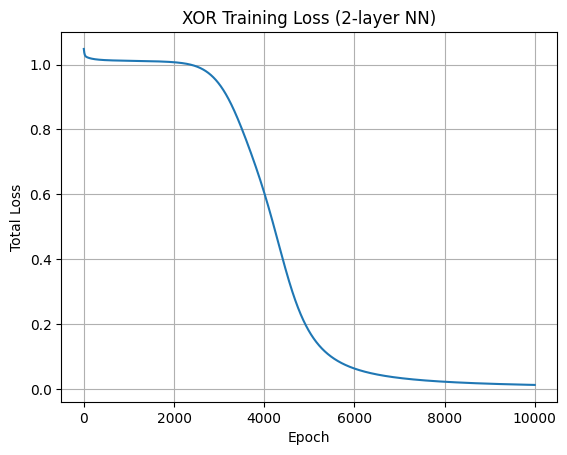

XOR Predictions (2-layer NN):
Input: [0 0], Predicted: 0, Expected: 0
Input: [0 1], Predicted: 1, Expected: 1
Input: [1 0], Predicted: 1, Expected: 1
Input: [1 1], Predicted: 0, Expected: 0


In [16]:
# Step 9: Train the 2-layer NN for XOR
y_xor = np.array([0, 1, 1, 0])
X = np.array([[0,0],[0,1],[1,0],[1,1]])

xor_nn = TwoLayerNN(input_size=2, hidden_size=2, lr=0.1)
loss_xor_nn = xor_nn.train(X, y_xor)

# Plot training loss
plt.plot(loss_xor_nn)
plt.title("XOR Training Loss (2-layer NN)")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.grid(True)
plt.show()

# Show predictions
print("XOR Predictions (2-layer NN):")
for i, x in enumerate(X):
    pred = xor_nn.predict([x])[0]
    print(f"Input: {x}, Predicted: {pred}, Expected: {y_xor[i]}")


I then explored each neuron's activation region.
I asked GPT in this way: Visualize hidden neuron outputs and then show the final region...



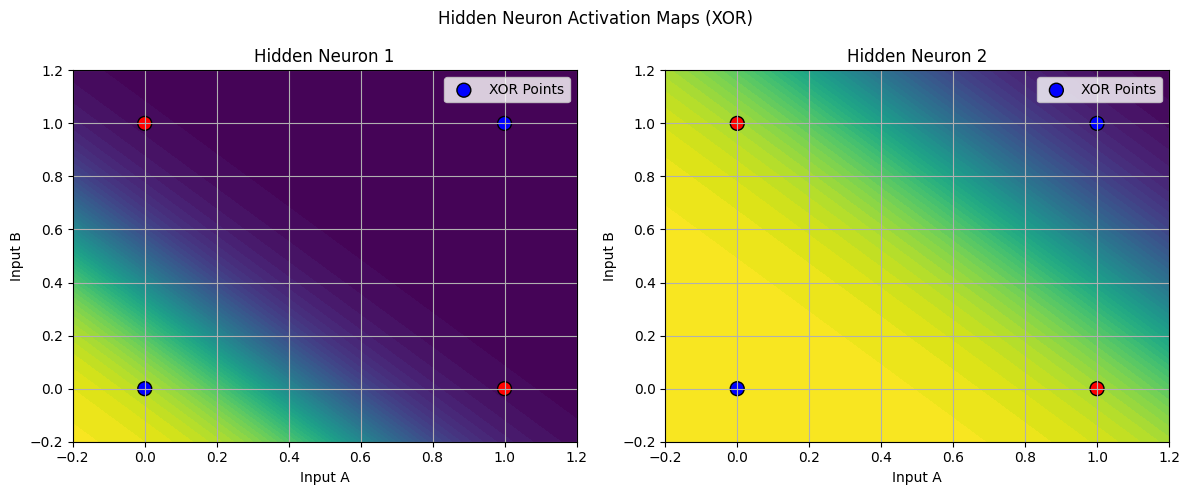

In [18]:
# Step 11: Visualize hidden neuron activations
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Hidden Neuron Activation Maps (XOR)")

xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 200), np.linspace(-0.2, 1.2, 200))
grid = np.c_[xx.ravel(), yy.ravel()]

for i in range(2):  # for each hidden neuron
    # Compute activation over the input space
    z_hidden = sigmoid(np.dot(grid, xor_nn.w1) + xor_nn.b1)[:, i]
    z_hidden = z_hidden.reshape(xx.shape)

    ax = axes[i]
    ax.contourf(xx, yy, z_hidden, cmap="viridis", levels=50)
    ax.set_title(f"Hidden Neuron {i+1}")
    ax.scatter(X[:, 0], X[:, 1], c=y_xor, cmap='bwr', s=100, edgecolors='k', label="XOR Points")
    ax.set_xlabel("Input A")
    ax.set_ylabel("Input B")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()


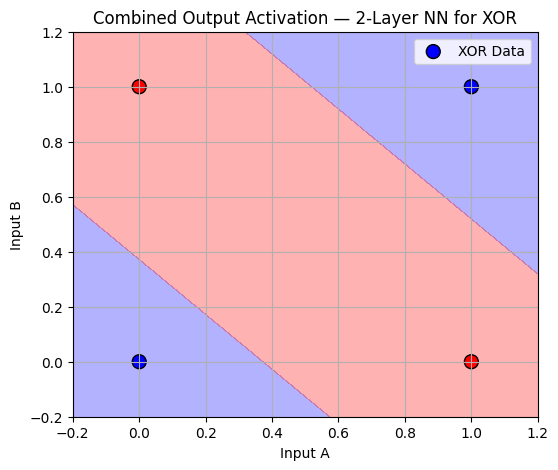

In [19]:

xx, yy = np.meshgrid(np.linspace(-0.2, 1.2, 200), np.linspace(-0.2, 1.2, 200))
grid = np.c_[xx.ravel(), yy.ravel()]
zz = np.array([xor_nn.forward(pt) for pt in grid])
zz = zz.reshape(xx.shape)

plt.figure(figsize=(6, 5))
plt.title("Combined Output Activation — 2-Layer NN for XOR")
plt.contourf(xx, yy, zz, levels=[-0.1, 0.5, 1.1], colors=["blue", "red"], alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y_xor, cmap='bwr', s=100, edgecolors='k', label="XOR Data")
plt.xlabel("Input A")
plt.ylabel("Input B")
plt.legend()
plt.grid(True)
plt.show()


As shown above, we can clearly see that the outputs of the two hidden neurons are further weighted and combined to produce the final output region. It’s like two boundary lines working together to form a non-linear decision region that correctly separates the XOR pattern.